# Titanic Data Visualization

In [1]:
library(readr)
library(dplyr)
library(tibble)
library(ggplot2)
library(ggthemes)
library(gridExtra)
library(RColorBrewer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:
titanic <- read_csv("../Data/titanic_train.csv")
head(titanic)

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


<hr>

# Cleaning up Data

## Look at Missing Values (NA)
- See Which Columns have Missing Values
- Use select_if() to provide condition
- Use summarise_each() function to get a count for each Column
- Use . to refer to all the columns to which the functions in funs are applied

In [4]:
titanic %>% 
  select_if(function(x) any(is.na(x))) %>% 
  summarise_each(funs(sum(is.na(.)))) 

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


Age,Cabin,Embarked
177,687,2


### Only 2 Missing Values in Embarked
- Look at the distribution
- Only 2 Missing Values and 72% is "S"
- Replace NA with "S"


In [5]:
table(titanic$Embarked)


  C   Q   S 
168  77 644 

In [6]:
titanic %>%
  group_by(Embarked) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

Embarked,Count,Percentage
C,168,19
Q,77,9
S,644,72
NA,2,0


In [7]:
# Filter the rows that have Missing Values for Embarked
titanic %>%
  filter(is.na(Embarked))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NA
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NA


In [8]:
# Replace NA in Embarked with "S"
# replace(x, list, values) replaces the values in x with indices given in list by those given in values
# Check before overwritting
titanic %>%
  mutate(Embarked = replace(Embarked, is.na(Embarked), "S")) %>%
  group_by(Embarked) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

Embarked,Count,Percentage
C,168,19
Q,77,9
S,646,73


In [10]:
titanic <- titanic %>%
  mutate(Embarked = replace(Embarked, is.na(Embarked), "S"))

head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Add another Varibale for Family Size
- Add SibSp and Parch + Self

In [11]:
titanic <- titanic %>%
  mutate(FamilySize = 1 + SibSp + Parch) 

## Convert "Pclass", "Survived", "Sex", and "Embarked" Variables into Factors

In [12]:
titanic <- titanic %>%
  mutate(Pclass = factor(Pclass), Survived = factor(Survived), Sex = factor(Sex), Embarked = factor(Embarked)) 

head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S,1
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q,1


<hr>

# Visualization

## Look at Survival Rate with a barplot
- Add some styling to the plot: Center the Title and color, Edit the Legends 
- More Poeple Died than Survived (549:342)
- Convert a table of ratio to a tibble to use in geom_text() to add the Count to the bars

In [13]:
ratio <- table(titanic$Survived) %>%
  as_tibble() %>%
  rename(Survived = Var1, Count = n)

ratio

Survived,Count
0,549
1,342


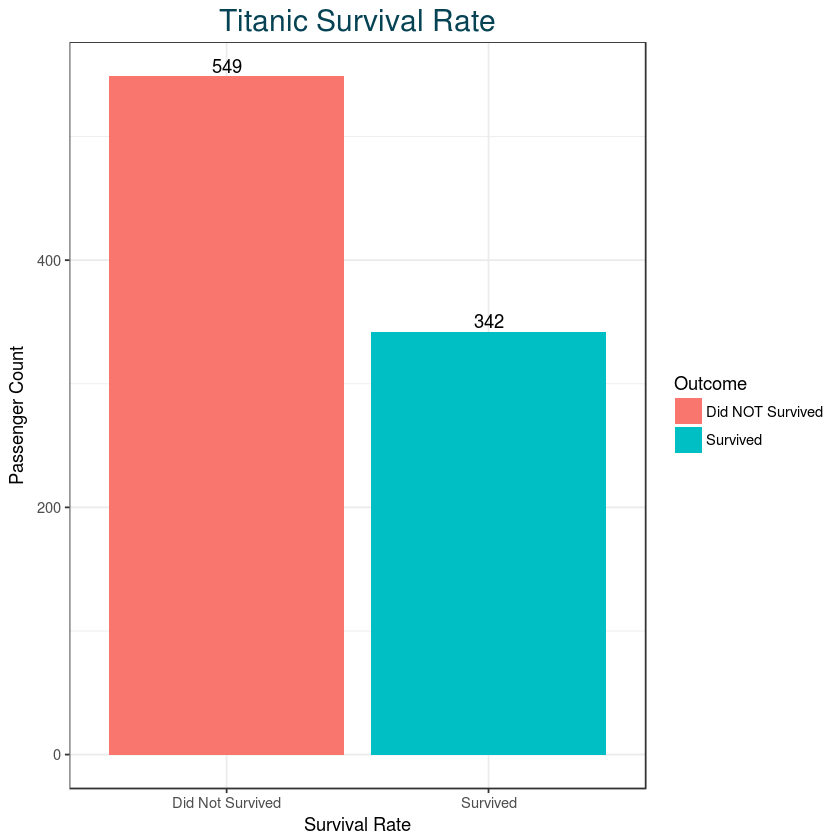

In [14]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  geom_text(data = ratio, aes(x = Survived, y = Count, label = Count), position=position_dodge(width=0.9), vjust=-0.25) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survived", "Survived")) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))

## Barplot with proportion
- Using y=..count../sum(..count..) option
- More Poeple died than Survived (62% to 38%)

In [15]:
prop_ratio <- prop.table(table(titanic$Survived)) %>%
  as_tibble() %>%
  rename(Survived = Var1, Count = n)

prop_ratio

Survived,Count
0,0.6161616
1,0.3838384


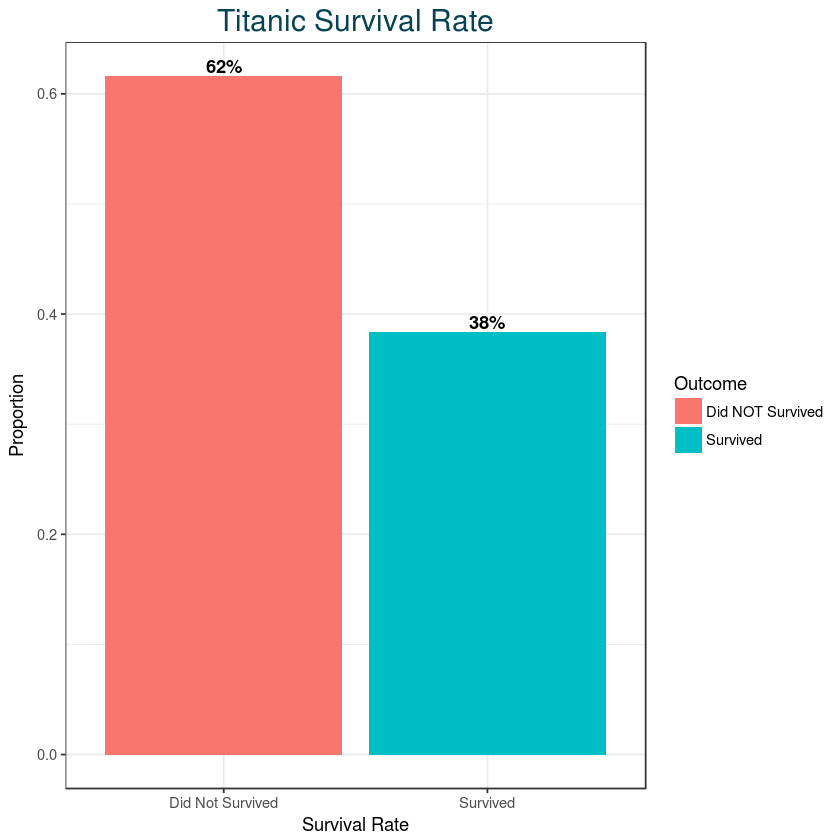

In [16]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, y=..count../sum(..count..), fill = Survived)) +
  geom_text(data = prop_ratio, aes(x = Survived, y = Count, label = paste0(round(Count, 2)*100, "%")), position = position_dodge(width=0.9), vjust=-0.25, fontface = "bold") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survived", "Survived")) +
  scale_y_continuous(name = "Proportion") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))

<hr>

## Look at Survival Rate by Gender
- Use Gender on the x-axis
- Use Color to represent Survival on the Plot
- Total Females: 314 
   - 74% Survived
   - 26% Did NOT Survive
- Total Males: 577
  - 19% Survived
  - 81% Did NOT Survive

In [17]:
gender <- titanic %>%
  group_by(Sex) %>%
  summarise(Count = n())

gender

Sex,Count
female,314
male,577


In [18]:
gender_ratio <- titanic %>%
  group_by(Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

gender_ratio

Sex,Survived,Count,Percentage
female,0,81,26
female,1,233,74
male,0,468,81
male,1,109,19


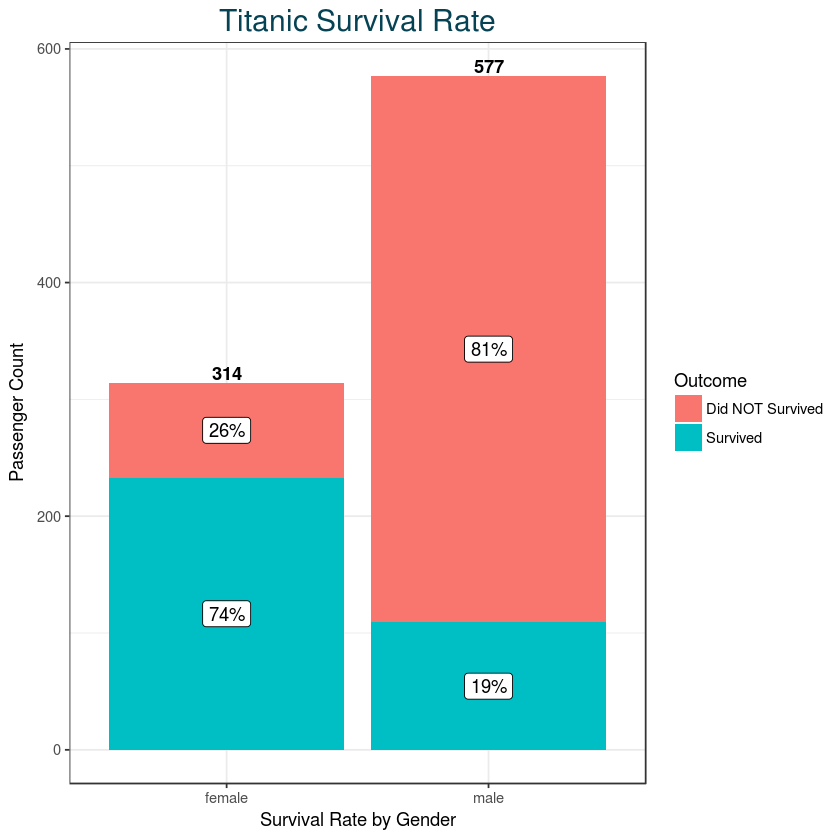

In [19]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  geom_text(data = gender, aes(x = Sex, y = Count, label = Count), position = position_dodge(width=0.9), vjust=-0.25, fontface = "bold") +
  geom_label(data = gender_ratio, aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Gender") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>

## Look at Survival Rate by Ticket Class
- Use Pclass on the x-axis
- Use Color to represent Survival on the Plot
- 1st Class: 216
  - 63% Survived
  - 37%  Did NOT Survive
- 2nd Class: 184
  - 47% Survived
  - 53%  Did NOT Survive
- 3rd Class: 491
  - 24% Survived
  - 76%  Did NOT Survive
  

In [20]:
pclass <- titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

pclass

Pclass,Count
1,216
2,184
3,491


In [21]:
pclass_ratio <- titanic %>%
  group_by(Pclass, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_ratio

Pclass,Survived,Count,Percentage
1,0,80,37
1,1,136,63
2,0,97,53
2,1,87,47
3,0,372,76
3,1,119,24


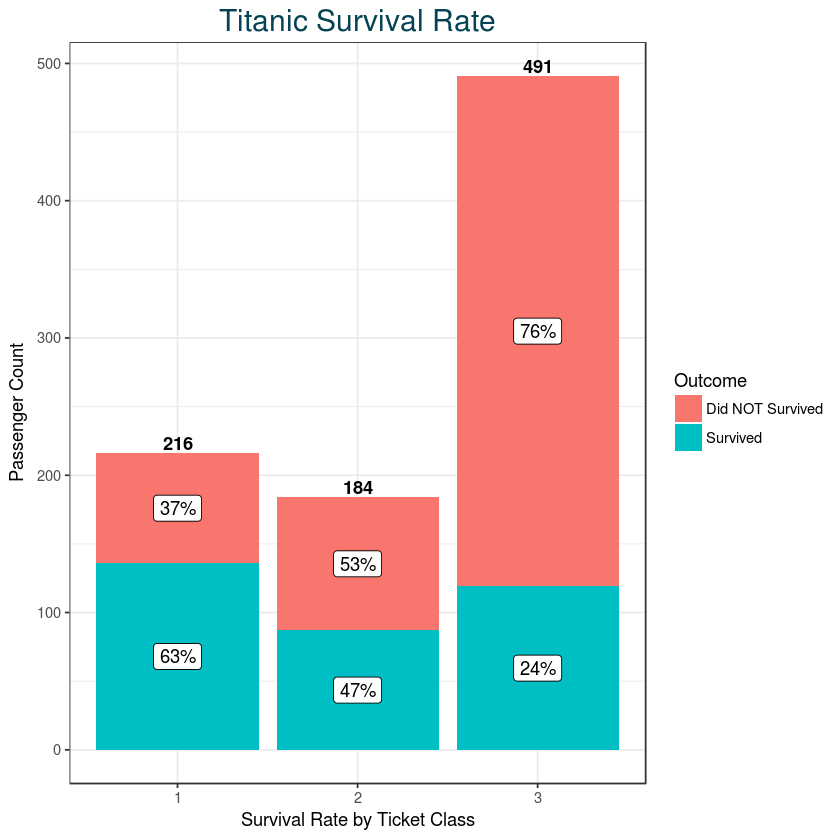

In [22]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Survived)) +
  geom_text(data = pclass, aes(x = Pclass, y = Count, label = Count), position = position_dodge(width=0.9), vjust=-0.25, fontface = "bold") +
  geom_label(data = pclass_ratio, aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Survived), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>

## Look at Gender Survival Rate by Ticket Class
- Use facetting to look at Gender Survival by Pclass
- Use Color to represent Survival on the Plot

### Looking at Gender Proportion in each Class
- 1st Class:
  - Females: 44%
  - Males: 56%
- 2nd Class:
  - Females: 41%
  - Males: 59%
- 3rd Class:
  - Females: 29%
  - Males: 71%
- Higher ratio of Male to Female in 3rd Class compared to 1st and 2nd Class

In [23]:
pclass_gender <- titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

pclass_gender

Pclass,Count
1,216
2,184
3,491


In [24]:
pclass_gender_ratio <- titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_ratio

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


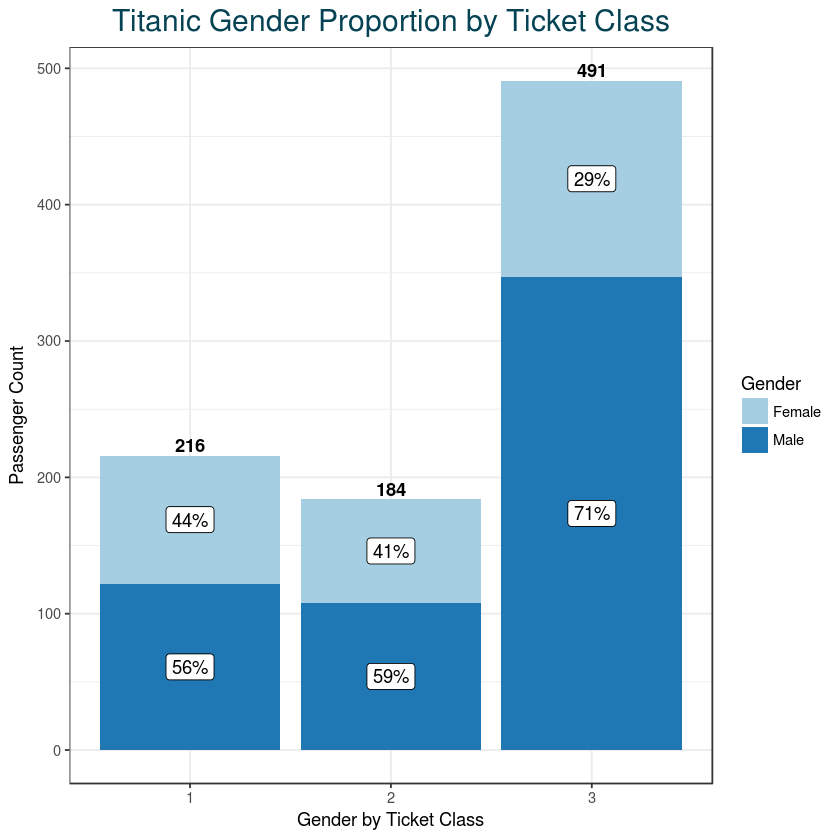

In [25]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Sex)) +
  geom_text(data = pclass_gender, aes(x = Pclass, y = Count, label = Count), position = position_dodge(width=0.9), vjust=-0.25, fontface = "bold") +
  geom_label(data = pclass_gender_ratio, aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Sex), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Gender Proportion by Ticket Class") +
  scale_x_discrete(name= "Gender by Ticket Class") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_brewer(name = "Gender", labels = c("Female", "Male"), palette = "Paired")

## Looking at Survival Rate by Gender Proportion in each Class
- 1st Class:
  - Females: 
    - 97% Survived
    - 3% Did Not Survive
  - Males:
    - 37% Survived
    - 63% Did Not Survive
- 2nd Class:
  - Females:
    - 92% Survived
    - 8% Did Not Survive
  - Males:
    - 16% Survived
    - 84% Did Not Survive
- 3rd Class:
  - Females:
    - 50% Survived
    - 50% Did Not Survive
  - Males:
    - 14% Survived
    - 86% Did Not Survive

In [26]:
pclass_gender_ratio <- titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_ratio

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


In [27]:
pclass_gender_survived_ratio <- titanic %>%
  group_by(Pclass, Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_survived_ratio

Pclass,Sex,Survived,Count,Percentage
1,female,0,3,3
1,female,1,91,97
1,male,0,77,63
1,male,1,45,37
2,female,0,6,8
2,female,1,70,92
2,male,0,91,84
2,male,1,17,16
3,female,0,72,50
3,female,1,72,50


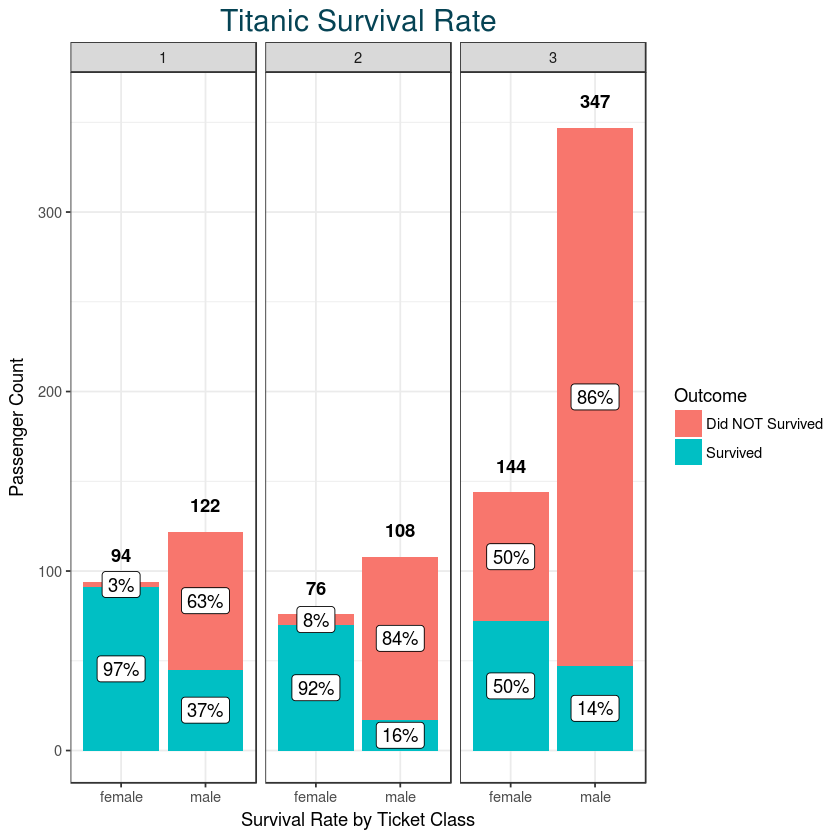

In [28]:
# Using facet_wrap(~ Pclass)
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  facet_wrap(~ Pclass) +
  geom_text(data = pclass_gender_ratio, aes(x = Sex, y = Count, label = Count), position = position_dodge(width=0.9), vjust= -1.5, fontface = "bold") +
  geom_label(data = pclass_gender_survived_ratio, aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class") +
  scale_y_continuous(name = "Passenger Count", limits = c(0,360)) +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

#### Looking at Gender Proportion in each Class and Survival

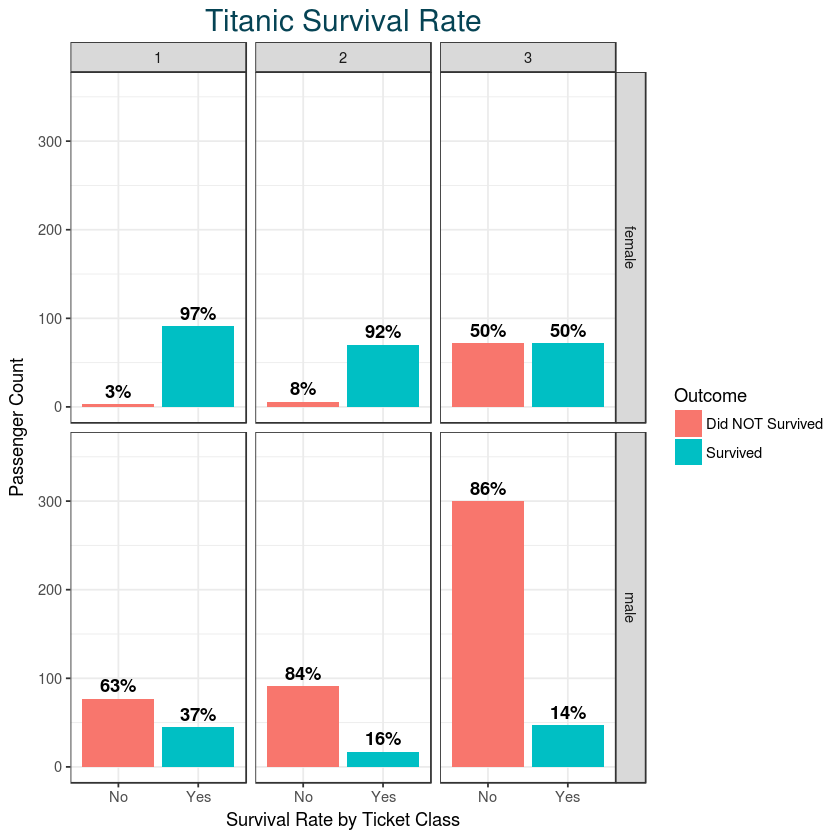

In [29]:
# Using facet_grid(Sex ~ Pclass) to separate Gender and Survival
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  facet_grid(Sex ~ Pclass) +
  geom_text(data = pclass_gender_survived_ratio, aes(x = Survived, y = Count, label = paste0(Percentage, "%")), position = position_dodge(width=0.9), vjust= -0.5, fontface = "bold") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, colour = "#054354")) +
  ggtitle("Titanic Survival Rate") +
  scale_x_discrete(name= "Survival Rate by Ticket Class", labels = c("No", "Yes")) +
  scale_y_continuous(name = "Passenger Count", limits = c(0,360)) +
  scale_fill_discrete(name = "Outcome", labels = c("Did NOT Survived", "Survived"))  

<hr>